# Проект - Машинное обучение

Для сети фитнес-центров необходимо проанализировать данные о клиентах. Из них выделить целевые группы, спрогнозировать их отток и предложить меры по снижению потери клиентов

## Получение данных

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:\\Users\\SpectNSK\\Desktop\\projects\\data set\\ml.csv')

In [3]:
print(df.shape)

(4000, 14)


In [4]:
display(df.head(5))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
df.duplicated().sum()

0

## Исследовательский анализ данных

In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Среднестатистический клиент: Проживает рядом, оставляет свой номер телефона, около 29 лет и с равной долей вероятности может быть мужчиной или женщиной)

In [8]:
ottok = df.query('Churn == 1')
client = df.query('Churn == 0')

In [9]:
ottok.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [10]:
client.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


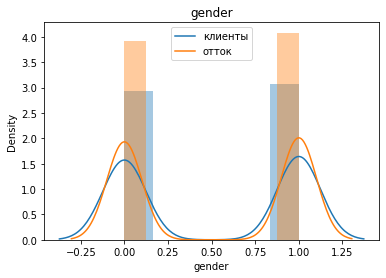

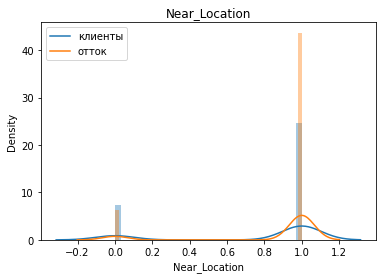

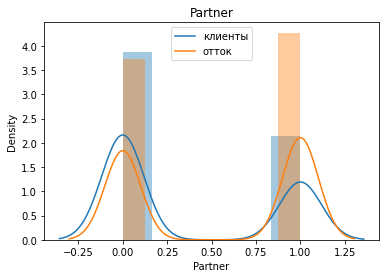

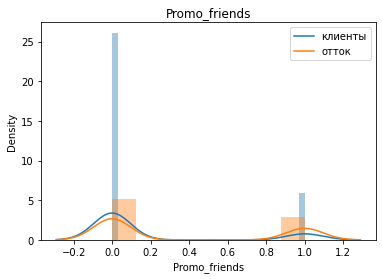

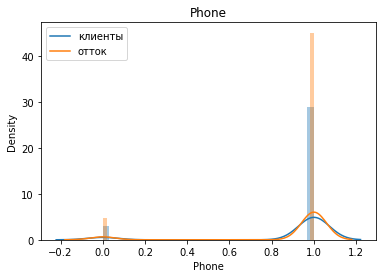

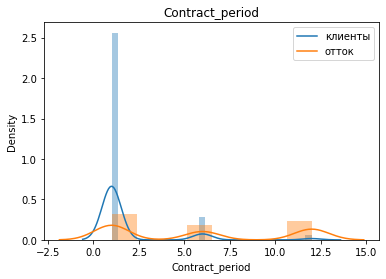

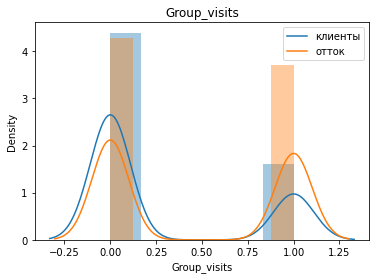

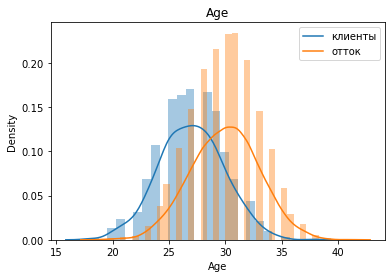

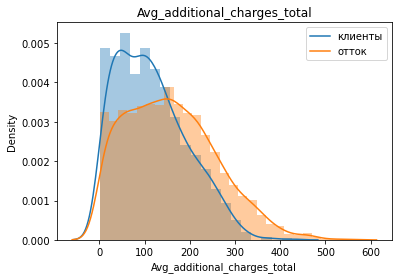

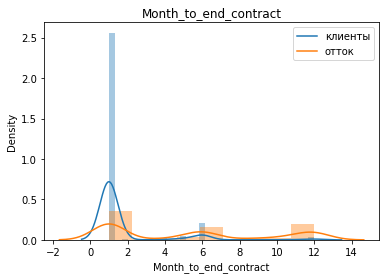

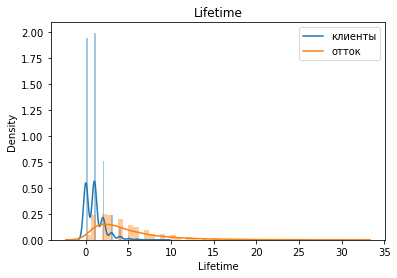

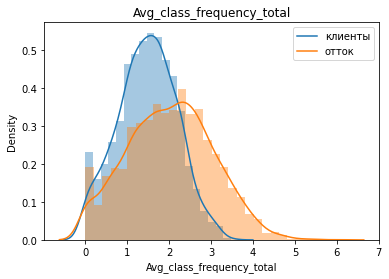

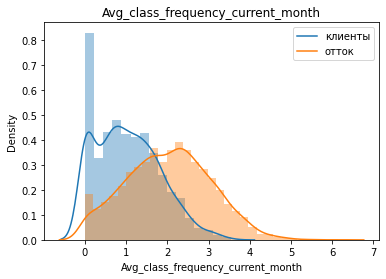

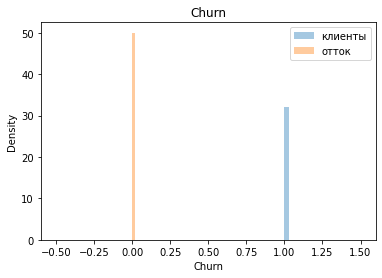

In [11]:
data = df.columns
for i in data:
    plt.title(i)
    sns.distplot(ottok[i])
    sns.distplot(client[i])
    plt.legend(['клиенты', 'отток'])
    plt.show()

Мы видим сходства в гендере и в факте оставления номера телефона. Различия в том, что класс с оттоком в среднем живёт дальше, у них меньше участий в промо акциях и групповых занятиях, а так же заметно меньше срок абонемента 

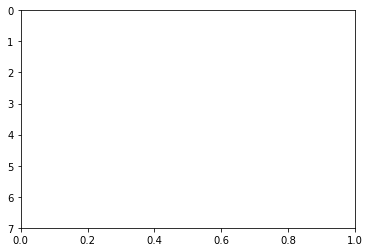

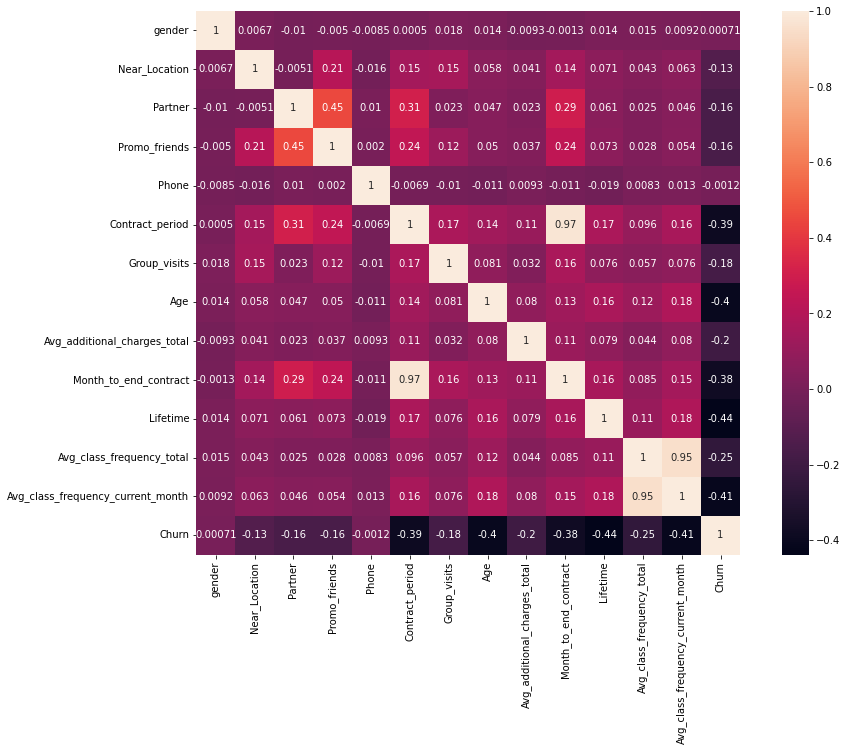

In [12]:
cm = df.corr() 
fig, ax = plt.subplots()

plt.figure(figsize = (15, 10))
sns.heatmap(cm, annot=True, square=True)
ax.set_ylim(
    7, 0
)  

plt.show()

In [13]:
df = df.drop('Avg_class_frequency_current_month', axis = 1)
df = df.drop('Contract_period', axis = 1)

# Удаляем один из сильно коррелирующих столбцов


Целевая переменная заметно коррелирует со сроком абонемента(в разных вариациях) и неожиданно возрастом. И совсем не коррелирует с полом и телефоном

## Строим модель прогнозирования оттока клиентов

### Логистическая регрессия

In [14]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1] 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions) ))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions) ))

Accuracy: 0.88
Precision: 0.76
Recall: 0.77


### Случайный лес

In [16]:
model2 = RandomForestClassifier(n_estimators = 100, random_state = 0)
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
print('Accuracy2: {:.2f}'.format(accuracy_score(y_test, predictions2) ))
print('Precision2: {:.2f}'.format(precision_score(y_test, predictions2)))
print('Recall2: {:.2f}'.format(recall_score(y_test, predictions2) ))

Accuracy2: 0.90
Precision2: 0.80
Recall2: 0.77


Выберем модель случайный лес. У данной модели показатели лучше

## Кластеризация клиентов

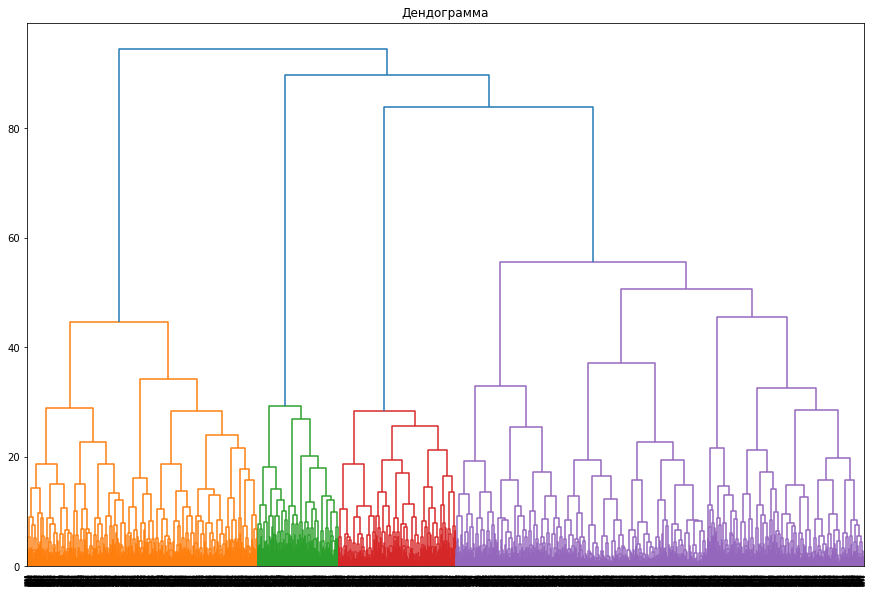

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендограмма')
plt.show() 

In [18]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)
df['cluster'] = labels
df.groupby('cluster').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
cluster,,,,,,,,,,,,
0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


Лояльные кластеры 0 и 2. Для них характерна близость расположения, значительная доля групповых визитов, длительный абонемент и большое число доп. покупок. Но в 0 кластере большое количество участий в партнерских акциях, а во втором нет

In [19]:
# определим функцию отрисовки графиков попарных признаков для булевых кластеров
def show_clusters_on_plot_boolean(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    plt.grid(visible=True)
    sns.barplot(
        x=df[x_name], y=df[y_name], hue=df[cluster_name], palette='Paired', 
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [20]:
# определим функцию отрисовки графиков попарных признаков для небулевых кластеров
def show_clusters_on_plot_non_boolean(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    plt.grid(visible=True)
    sns.scatterplot(
        x=df[x_name], y=df[y_name], hue=df[cluster_name], palette='Paired', 
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [21]:
df_boolean = df.drop(['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Age', 'Month_to_end_contract', 'Lifetime'], axis = 1)
df_non_boolean = df.drop(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn'], axis = 1)

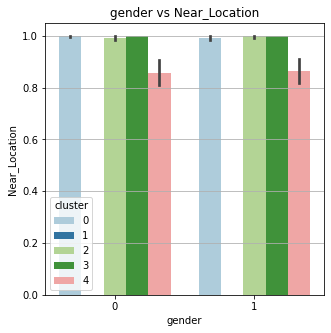

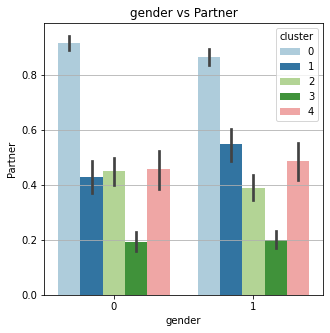

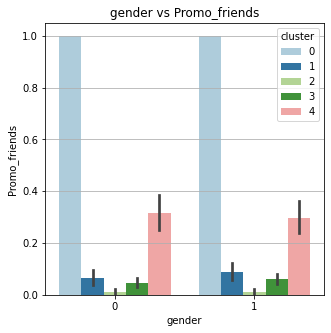

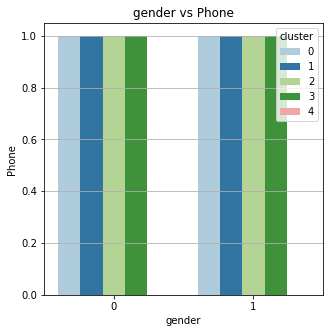

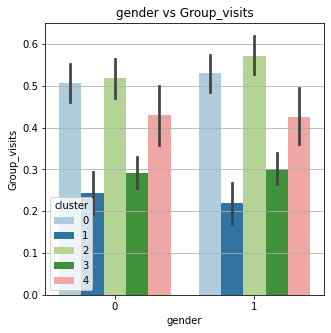

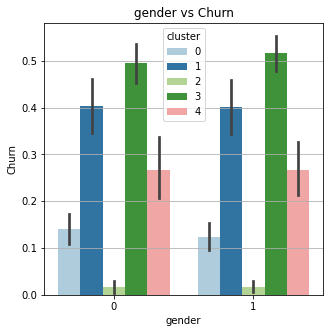

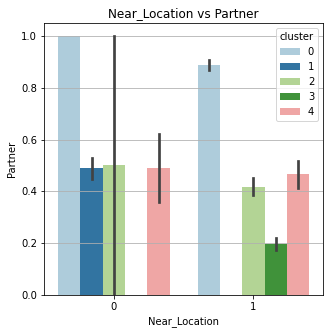

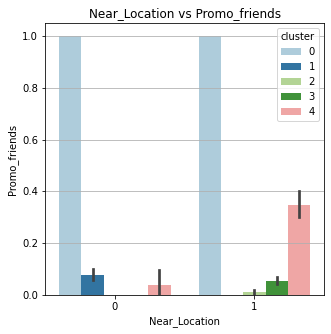

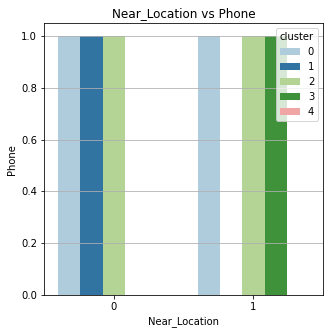

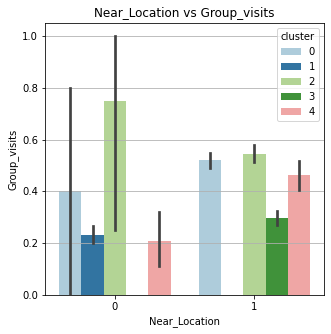

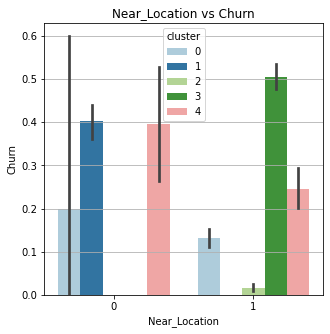

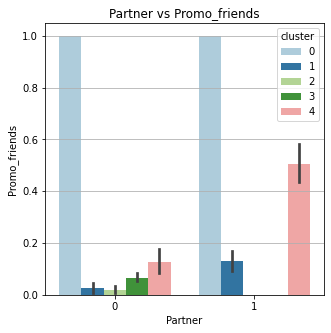

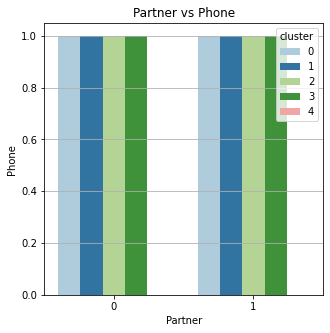

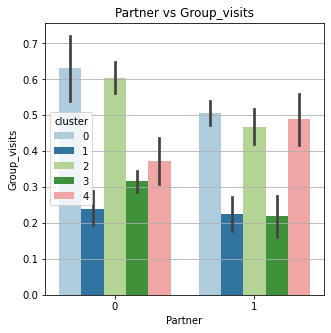

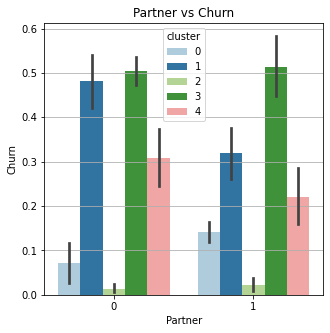

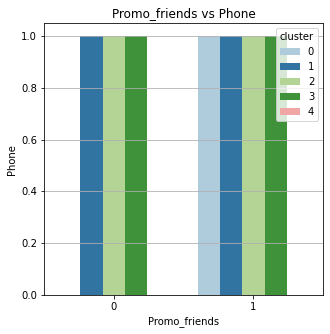

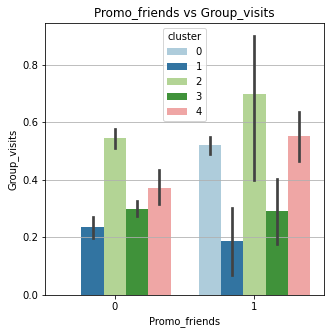

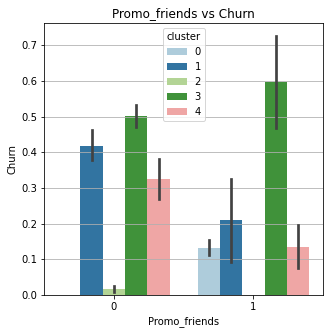

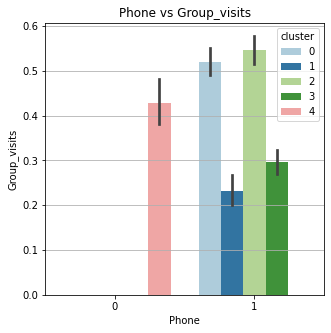

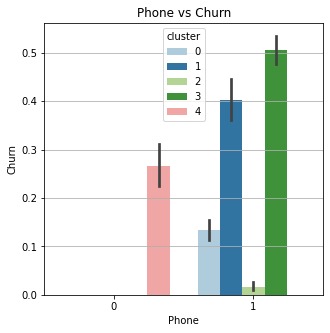

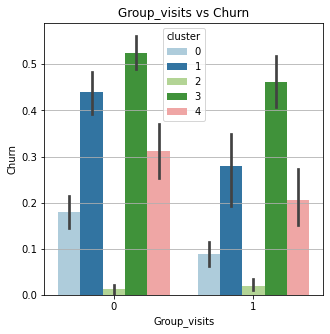

In [22]:
col_pairs = list(itertools.combinations(df_boolean.drop('cluster', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot_boolean(df_boolean, pair[0], pair[1], 'cluster')

In [24]:
df_non_boolean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           4000 non-null   int64  
 1   Avg_additional_charges_total  4000 non-null   float64
 2   Month_to_end_contract         4000 non-null   float64
 3   Lifetime                      4000 non-null   int64  
 4   Avg_class_frequency_total     4000 non-null   float64
 5   cluster                       4000 non-null   int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 172.0 KB


<AxesSubplot:xlabel='cluster', ylabel='Age'>

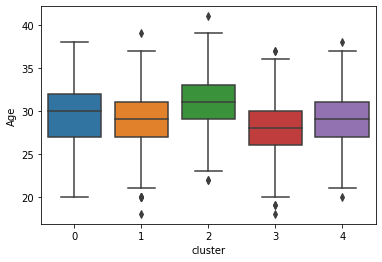

In [25]:
sns.boxplot(x = 'cluster', y= df_non_boolean['Age'], data = df_non_boolean)   

<AxesSubplot:xlabel='cluster', ylabel='Avg_additional_charges_total'>

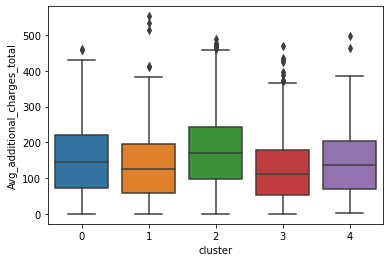

In [26]:
sns.boxplot(x = 'cluster', y= df_non_boolean['Avg_additional_charges_total'], data = df_non_boolean)

<AxesSubplot:xlabel='cluster', ylabel='Month_to_end_contract'>

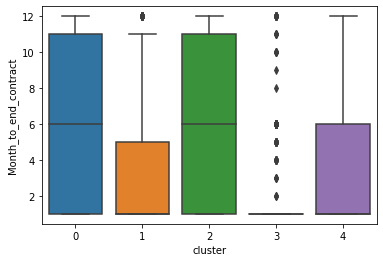

In [27]:
sns.boxplot(x = 'cluster', y= df_non_boolean['Month_to_end_contract'], data = df_non_boolean)

<AxesSubplot:xlabel='cluster', ylabel='Lifetime'>

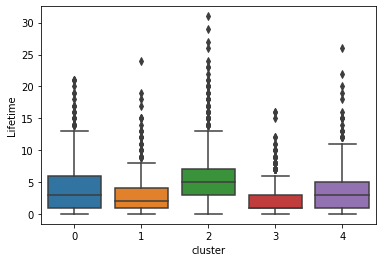

In [28]:
sns.boxplot(x = 'cluster', y= df_non_boolean['Lifetime'], data = df_non_boolean)

<AxesSubplot:xlabel='cluster', ylabel='Avg_class_frequency_total'>

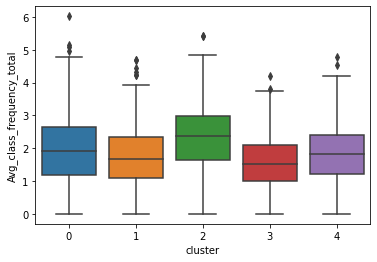

In [29]:
sns.boxplot(x = 'cluster', y= df_non_boolean['Avg_class_frequency_total'], data = df_non_boolean)

## Вывод:

Мы получили две хорошо работающие модели по прогнозированию оттока клиентов. Показатели основных метрик:
Логистическая регрессия:
Accuracy: 0.88
Precision: 0.76
Recall: 0.77
Случайный лес:
Accuracy2: 0.90
Precision2: 0.80
Recall2: 0.77
Обе модели показывают высокие и близкие результаты, но метрики случайного леса всёже лучше

 Наибольший отток во 1 и 3 кластерах. Для них характерны такие признаки как: Скорое окончание абонемента, отсутствие посещений групповых занятий, а так же отсуствие промокода 'приведи друга', а отдельно для 3 кластера ещё и отсутсвии партнерской скидки  говорит нам о том,что люди занимающиеся с друзьями вероятнее останутся с нашим фитнесс центром.
 

## Рекомендации:

Использовать для прогнозирования оттока клиентов модель: случайный лес. 

Менеджерам по развитию стоит обратить внимания на то из каких районов от нас уходят клиенты и рассмотреть возможность открытия там филиалов.

Менеджерам по работе с клиентами нужно уделить особое внимание клиентам из 1 и 3 кластера. Возможно прислать им индивидуальные скидки. А для клиентов из 4 кластера (у которых не указан телефон)предложить скидку при их ближайшем посещении

Так же стоит активнее предлогать новые абонементы тем, у кого они вскоре закончатся